**Importing the modules**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

**Load the dataset**

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin1')  1'


**Data preprocessing:**  Convert labels to binary (0 for 'ham', 1 for 'spam')

In [ ]:
print(data.columns)
print(data.head())
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


**Feature extraction**

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


**Plotting histogram of word frequencies**

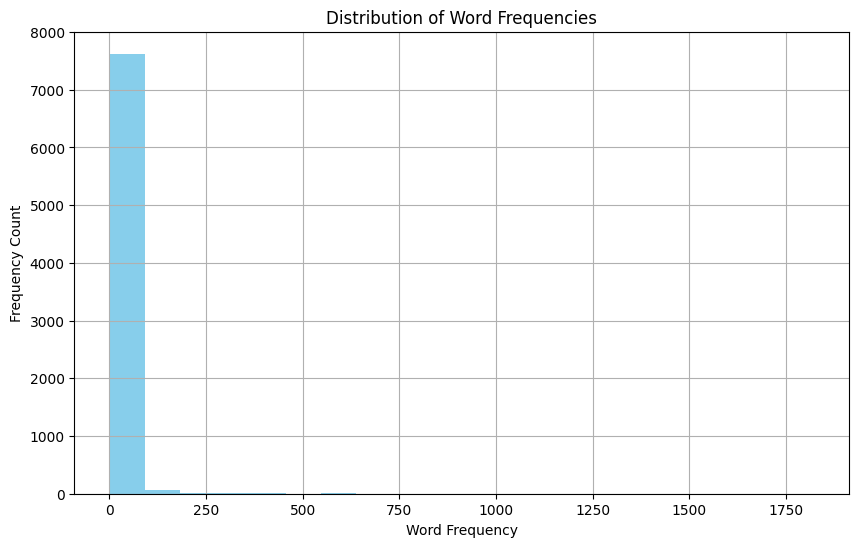

In [ ]:
word_freq = np.sum(X_train_vectorized, axis=0)
plt.figure(figsize=(10, 6))
plt.hist(word_freq.A1, bins=20, color='skyblue')
plt.title('Distribution of Word Frequencies')
plt.xlabel('Word Frequency')
plt.ylabel('Frequency Count')
plt.grid(True)
plt.show()

**Training the model:** Naive Bayes Classifier

In [ ]:

clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)
y_pred = clf.predict(X_test_vectorized)


**Evaluating the model**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



**Testing the model**

In [ ]:
new_email = ["Get rich quick! Earn $$$ in just one week!"]
new_email_vectorized = vectorizer.transform(new_email)
prediction = clf.predict(new_email_vectorized)
print("\nPrediction for new email:", prediction)
if prediction[0] == 1:
    print("\nPrediction for new SMS: Spam")
else:
    print("\nPrediction for new SMS: Not spam")


Prediction for new email: ['ham']

Prediction for new SMS: Not spam
